In [ ]:
Research question

Total rows found for Spain: 8760
Total Annual Demand (2022): 236,085.52 GWh


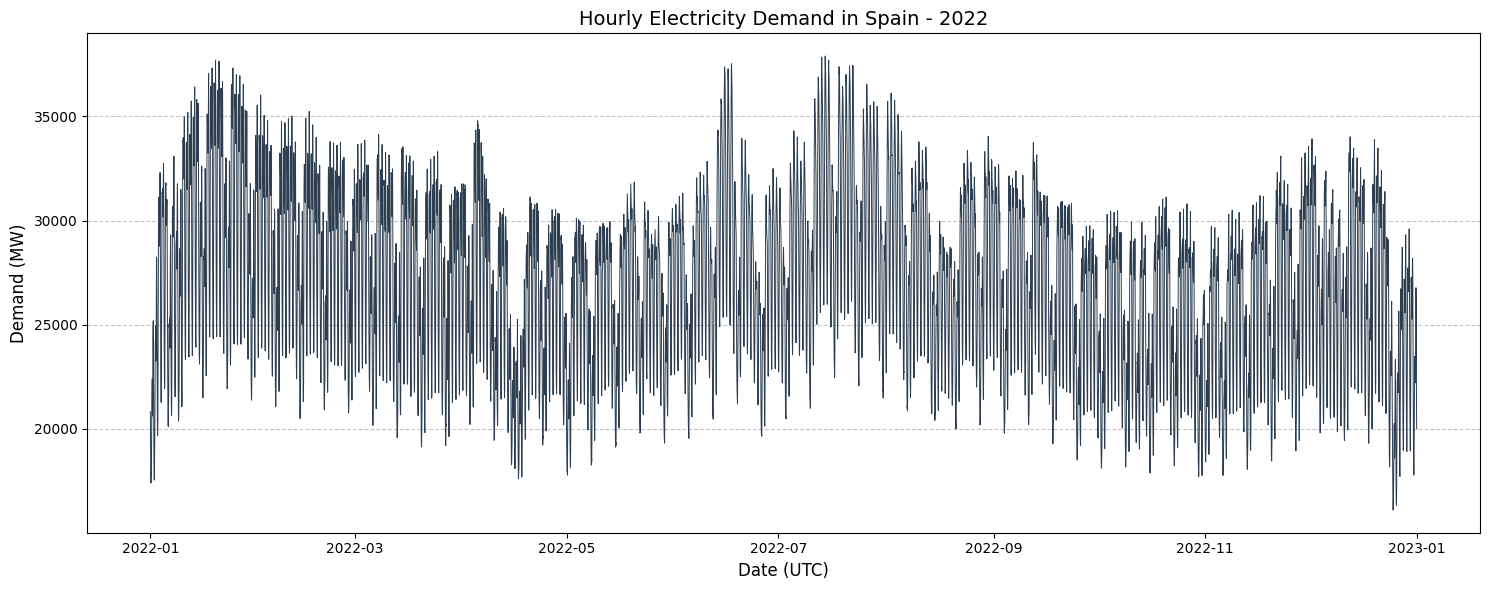

In [2]:

import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the data
file_name = 'data/monthly_hourly_load_values_2022.csv' # found at https://www.entsoe.eu/data/power-stats/


df = pd.read_csv(file_name, sep=';')

# 2. Clean up column names (removes any hidden spaces)
df.columns = df.columns.str.strip()

# 3. Filter for Spain and clean the data
df_es = df[df['CountryCode'] == 'ES'].copy()

# Convert Value to numeric (MW)
df_es['Value'] = pd.to_numeric(df_es['Value'], errors='coerce')

# Convert DateUTC to a real Python datetime object
# We use dayfirst=True because the header showed DD/MM/YYYY
df_es['DateUTC'] = pd.to_datetime(df_es['DateUTC'], dayfirst=True)

# Sort by date to ensure the plot line doesn't jump around
df_es = df_es.sort_values('DateUTC')

# 4. Quick Summary (Helpful for your Step 1)
total_gwh = df_es['Value'].sum() / 1000
print(f"Total rows found for Spain: {len(df_es)}")
print(f"Total Annual Demand (2022): {total_gwh:,.2f} GWh")

# 5. Plotting
plt.figure(figsize=(15, 6))
plt.plot(df_es['DateUTC'], df_es['Value'], color='#2c3e50', linewidth=0.7)

plt.title('Hourly Electricity Demand in Spain - 2022', fontsize=14)
plt.ylabel('Demand (MW)', fontsize=12)
plt.xlabel('Date (UTC)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optional: Zoom in on a specific week to see the daily shapes
# plt.xlim(pd.Timestamp('2022-01-01'), pd.Timestamp('2022-01-08'))

plt.tight_layout()
plt.show()